<a href="https://colab.research.google.com/github/zeph0yr/Data-Mining-and-Prediction-Modelling/blob/master/LSTM_ERROR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [164]:
import pandas as pd
df = pd.read_csv("/kaggle/input/stock-price/AAPL.csv")

FileNotFoundError: ignored

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-30,163.250000,166.149994,160.229996,165.250000,162.803864,61109800
1,2019-01-31,166.110001,169.000000,164.559998,166.440002,163.976242,40739600
2,2019-02-01,166.960007,168.979996,165.929993,166.520004,164.055069,32668100
3,2019-02-04,167.410004,171.660004,167.279999,171.250000,168.715042,31495500
4,2019-02-05,172.860001,175.080002,172.350006,174.179993,171.601685,36101600


In [7]:
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
248,2020-01-24,320.250000,323.329987,317.519989,318.309998,318.309998,36634400
249,2020-01-27,310.059998,311.769989,304.880005,308.950012,308.950012,40485000
250,2020-01-28,312.600006,318.399994,312.190002,317.690002,317.690002,40558500
251,2020-01-29,324.450012,327.850006,321.380005,324.339996,324.339996,54057300
252,2020-01-30,320.542999,324.089996,318.750000,319.839996,319.839996,21260504


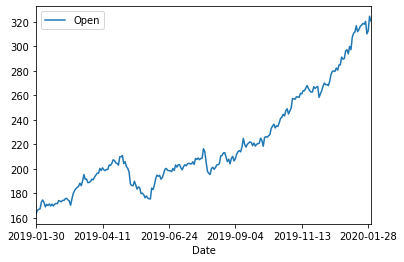

In [8]:
df.plot(x='Date', y='Open')

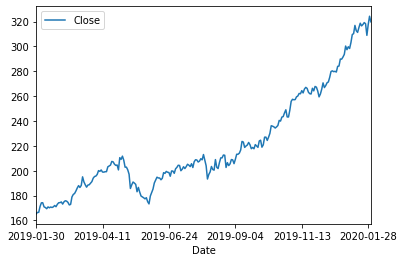

In [9]:
df.plot(x='Date', y='Close')


In [136]:
training_data = df.iloc[0:247,1:2].values
training_data

array([[163.25    ],
       [166.110001],
       [166.960007],
       [167.410004],
       [172.860001],
       [174.649994],
       [172.399994],
       [168.990005],
       [171.050003],
       [170.100006],
       [171.389999],
       [169.710007],
       [171.25    ],
       [169.710007],
       [171.190002],
       [171.800003],
       [171.580002],
       [174.160004],
       [173.710007],
       [173.210007],
       [174.320007],
       [174.279999],
       [175.690002],
       [175.940002],
       [174.669998],
       [173.869995],
       [170.320007],
       [175.490005],
       [180.      ],
       [182.25    ],
       [183.899994],
       [184.850006],
       [185.800003],
       [188.350006],
       [186.229996],
       [190.020004],
       [195.339996],
       [191.509995],
       [191.660004],
       [188.75    ],
       [188.949997],
       [189.830002],
       [191.639999],
       [191.089996],
       [193.25    ],
       [194.789993],
       [196.449997],
       [196.4

In [0]:
#data normalization......
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
training_data = scaler.fit_transform(training_data)

In [0]:
#Convert Training Data to Right Shape
features_set = []
labels = []
for i in range(160,247):
    features_set.append(training_data[i-160:i,0])
    labels.append(training_data[i,0])
    
#convert feature_set and labels in numpy array .....
features_set , labels = np.array(features_set) , np.array(labels)

#convert the feature_set into a 3 dimentional format.....
features_set = np.reshape(features_set, (features_set.shape[0] , features_set.shape[1] , 1))

In [152]:
#features_set shape......
print(features_set.shape)
print(labels.shape)

(87, 160, 1)
(87,)


In [0]:
#import libraries.......
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [0]:
#build a LSTM model......
model = Sequential()

model.add(LSTM(units= 50, return_sequences= True , input_shape = (features_set.shape[1], 1) ))
model.add(Dropout(0.2))
model.add(LSTM(units = 50 , return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units= 1))

In [155]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 160, 50)           10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 160, 50)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 160, 50)           20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 160, 50)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 160, 50)           20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 160, 50)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)               

In [0]:
#compiling the model.....
model.compile(optimizer = 'adam' , loss = 'mean_squared_error', metrics=['accuracy'])

In [157]:
print(features_set.shape)
print(labels.shape)

(87, 160, 1)
(87,)


In [145]:
fitted_model =  model.fit(features_set , labels , epochs = 100 , batch_size = 32)


Epoch 1/100
87/87 [==============================] - 5s 53ms/step - loss: 0.3591 - acc: 0.0000e+00
Epoch 2/100
87/87 [==============================] - 1s 17ms/step - loss: 0.1686 - acc: 0.0000e+00
Epoch 3/100
87/87 [==============================] - 2s 18ms/step - loss: 0.0404 - acc: 0.0115
Epoch 4/100
87/87 [==============================] - 1s 17ms/step - loss: 0.0333 - acc: 0.0115
Epoch 5/100
87/87 [==============================] - 1s 17ms/step - loss: 0.0193 - acc: 0.0115
Epoch 6/100
87/87 [==============================] - 1s 17ms/step - loss: 0.0308 - acc: 0.0115
Epoch 7/100
87/87 [==============================] - 1s 17ms/step - loss: 0.0172 - acc: 0.0115
Epoch 8/100
87/87 [==============================] - 1s 17ms/step - loss: 0.0123 - acc: 0.0115
Epoch 9/100
87/87 [==============================] - 1s 17ms/step - loss: 0.0152 - acc: 0.0115
Epoch 10/100
87/87 [==============================] - 1s 17ms/step - loss: 0.0156 - acc: 0.0115
Epoch 11/100
87/87 [=====================

In [146]:
import pandas as pd
AAPL_test = pd.read_csv("AAPL.csv")
AAPL_test.info()
AAPL_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
Date         253 non-null object
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-30,163.250000,166.149994,160.229996,165.250000,162.803864,61109800
1,2019-01-31,166.110001,169.000000,164.559998,166.440002,163.976242,40739600
2,2019-02-01,166.960007,168.979996,165.929993,166.520004,164.055069,32668100
3,2019-02-04,167.410004,171.660004,167.279999,171.250000,168.715042,31495500
4,2019-02-05,172.860001,175.080002,172.350006,174.179993,171.601685,36101600


In [158]:
testing_dataset = AAPL_test.iloc[:,1:2].values
x = pd.DataFrame(testing_dataset)
y = pd.DataFrame(training_data)
total = pd.concat([df['Open'] ,AAPL_test['Open']] , axis = 0)
print(type(total))
total = total.drop_duplicates()

<class 'pandas.core.series.Series'>


In [148]:
total.shape


(248,)

In [0]:
#prepare the test input.......
test_inputs = total[len(total) - len(AAPL_test) - 160:].values

In [160]:
#reshape the test data........
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)
print(testing_dataset.shape)

(165, 1)
(253, 1)


In [0]:
test_features = []
for i in range(-88,165):
    test_features.append(test_inputs[i+88:i, 0])

In [162]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

IndexError: ignored

In [0]:
print(test_features)

In [120]:
#prediction
predictions = model.predict(test_features)

ValueError: ignored